In [292]:
import pandas as pd
import cmocean as cmo
import math
import gsw as gsw
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
from scipy.special import gamma
from scipy.special import kv as K_nu
from speccy import sick_tricks as gary
from speccy import ut
import importlib
from scipy.interpolate import interp1d
import xarray as xr
import seaborn as sns
import numpy as np

from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [293]:
plt.rcParams['axes.labelsize'] = 'medium'
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = [25, 10]
#np.set_printoptions(threshold=sys.maxsize)
plt.rcParams['animation.embed_limit'] = 2**128

# Data Processing and Cleaning

## Import csv file 

In [296]:
from functions import Processing
importlib.reload(Processing)
KIM400_parameter  = pd.read_csv('KIM400 M1L1 Model fit parameters.csv')  
KIM200_parameter  = pd.read_csv('KIM200 M1L1 Model fit parameters.csv')  
PIL200_parameter  = pd.read_csv('PIL200 M1L1 Model fit parameters.csv')   
ITFTIS_parameter  = pd.read_csv('ITFTIS M1L1 Model fit parameters.csv') 
# NWSROW_parameter  = pd.read_csv('NWSROW Model fit parameters.csv')  

KIM400_Model_fit_Eg = Processing.read_pickle('KIM400_model_fit_P3 M1L1.pkl')
KIM200_Model_fit_Eg = Processing.read_pickle('KIM200_model_fit_P3 M1L1.pkl')
PIL200_Model_fit_Eg = Processing.read_pickle('PIL200_model_fit_P3 M1L1.pkl')
ITFTIS_Model_fit_Eg = Processing.read_pickle('ITFTIS_model_fit_P6 M1L1.pkl')
# NWSROW_Model_fit_Eg = Processing.read_pickle('NWS model fit P1.pkl')

In [297]:
Whole_Soln_df_M1P1 = pd.concat([PIL200_parameter,KIM200_parameter,KIM400_parameter,ITFTIS_parameter])
# Whole_Soln_df_M1P1 = pd.concat([PIL200_parameter,KIM400_parameter,ITFTIS_parameter])
#reset index
Whole_Soln_df_M1P1.reset_index(drop=True,inplace=True)
Whole_Soln_df_M1P1

,Dict_name,Year,Start_date,End_date,mean_temp,Whole_HA_var,HA_D1_var,HA_D2_var,Var_total,Var_subtidal,...,Var_model_fit,Whittle_value,η_c,α_c,η_D2,τ_D2,γ_D2,Site,Depth,season
0,PIL200_P1_100.0_0,2012,2012-02-20,2012-05-10,24.078767,0.178950,0.000914,0.179415,0.780755,0.260689,...,0.247120,-15424.618292,0.499938,0.905871,0.263406,5.656006,1.041353,PIL200,100.0,Feb-Apr
1,PIL200_P1_110.0_0,2012,2012-02-20,2012-05-10,23.504802,0.169370,0.002049,0.168712,0.770912,0.277021,...,0.230768,-15778.281198,0.476571,0.931134,0.261006,4.753258,1.121451,PIL200,110.0,Feb-Apr
2,PIL200_P1_120.0_0,2012,2012-02-20,2012-05-10,22.973728,0.158661,0.002598,0.157608,0.795259,0.293075,...,0.258710,-15712.135006,0.491759,0.953753,0.292037,5.333156,1.004494,PIL200,120.0,Feb-Apr
3,PIL200_P1_130.0_0,2012,2012-02-20,2012-05-10,22.420539,0.147307,0.003857,0.145029,0.821566,0.289220,...,0.285363,-15400.199859,0.515534,0.942470,0.307990,5.856332,1.016406,PIL200,130.0,Feb-Apr
4,PIL200_P1_140.0_0,2012,2012-02-20,2012-05-10,21.904735,0.134346,0.003155,0.132734,0.807012,0.265631,...,0.310789,-15226.312411,0.541817,0.960653,0.315713,6.968706,1.022211,PIL200,140.0,Feb-Apr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,ITFTIS_P17_46.5_1,2018,2018-10-22,2019-01-10,27.654857,0.086098,0.041754,0.041172,0.749801,0.316340,...,0.360164,-16234.267510,0.353194,1.003188,0.544889,0.209180,1.016559,ITFTIS,46.5,Nov-Jan
1040,ITFTIS_P17_56.5_1,2018,2018-10-22,2019-01-10,26.734649,0.103719,0.050339,0.049161,1.003837,0.714267,...,0.368018,-16413.433427,0.284004,0.869322,0.592019,0.194385,1.102378,ITFTIS,56.5,Nov-Jan
1041,ITFTIS_P17_66.5_1,2018,2018-10-22,2019-01-10,25.453052,0.208238,0.129084,0.069811,1.478915,0.742968,...,0.433343,-15817.857653,0.527506,1.316178,0.511677,3.710056,0.246837,ITFTIS,66.5,Nov-Jan
1042,ITFTIS_P17_76.5_1,2018,2018-10-22,2019-01-10,24.513778,0.320145,0.221195,0.084958,1.614783,1.120370,...,0.464461,-15904.051973,0.500396,1.426090,0.564999,1.527472,0.329038,ITFTIS,76.5,Nov-Jan


## Adjust season confusion from year 2012-2014 in ITFTIS

In [299]:
#Those code is modifying the season confusion from year 2012-2014 in ITFTIS
# Filter the DataFrame
B = Whole_Soln_df_M1P1[(Whole_Soln_df_M1P1['Site'] == 'ITFTIS') & 
                        (Whole_Soln_df_M1P1['Year'] < 2015) & 
                        (Whole_Soln_df_M1P1['Year'] > 2011)]

# Define season labels
season_label_list = ['Feb-Apr', 'May-Jul', 'Aug-Oct', 'Nov-Jan']
# Iterate over unique years
for year in B['Year'].unique():
    # Create a copy of the filtered DataFrame for the current year
    df_year = B[B['Year'] == year].copy()  # Explicitly make a copy
    # Extract and sort unique months in the current year
    df_year['Month'] = pd.to_datetime(df_year['Start_date']).dt.month
    unique_months = df_year['Month'].unique()
    unique_months.sort()
    # Assign seasons based on the order of appearance of months
    for month_order, month in enumerate(unique_months):
        season = season_label_list[month_order]
        
        # Update 'season' column for rows with the current month in the original DataFrame
        Whole_Soln_df_M1P1.loc[(Whole_Soln_df_M1P1['Site'] == 'ITFTIS') &
                                (Whole_Soln_df_M1P1['Year'] == year) &
                                (pd.to_datetime(Whole_Soln_df_M1P1['Start_date']).dt.month == month), 
                                'season'] = season

## Filter extreme value of the parameter & the rows where LR_D2 is significant

In [301]:
#extreme value
small_η_c_df  = Whole_Soln_df_M1P1[Whole_Soln_df_M1P1['η_c']<=0.01]
large_τ_D2_df = Whole_Soln_df_M1P1[Whole_Soln_df_M1P1['τ_D2']>=15]
small_α_c_df  = Whole_Soln_df_M1P1[Whole_Soln_df_M1P1['α_c']<=0.5]
small_η_D2_df  = Whole_Soln_df_M1P1[Whole_Soln_df_M1P1['η_D2']<=0.01]
#significant LR_D2
significant_LR_df = Processing.Find_index_significant_LR(Whole_Soln_df_M1P1, cutoff_freq=10)
#assemble
drop_indices_df = pd.concat([small_η_c_df, large_τ_D2_df, small_α_c_df,small_η_D2_df,
                             significant_LR_df,]).drop_duplicates()
#drop the bad fits
Whole_Soln_df_M1P1_clean = Whole_Soln_df_M1P1.drop(index=drop_indices_df.index)
print('{}({}%) of {} fits are removed'.format(len(drop_indices_df),np.round(len(drop_indices_df)/len(Whole_Soln_df_M1P1)*100,2),len(Whole_Soln_df_M1P1)))
# Whole_Soln_df_M1P1_clean

C:\Users\21924032\GitHub\Yutao_PhD_codes\Aim1 1D Internal wave modeling\notebooks\1D internal tide temp model fit V1.7\functions\Cov.py:71: RuntimeWarning: overflow encountered in power
  LR_exp = np.exp(-np.power(np.abs(dx)*c,gamma))


166(15.9%) of 1044 fits are removed


In [302]:
a = pd.concat([small_η_c_df, large_τ_D2_df ,small_η_D2_df]).drop_duplicates()
len(a)

56

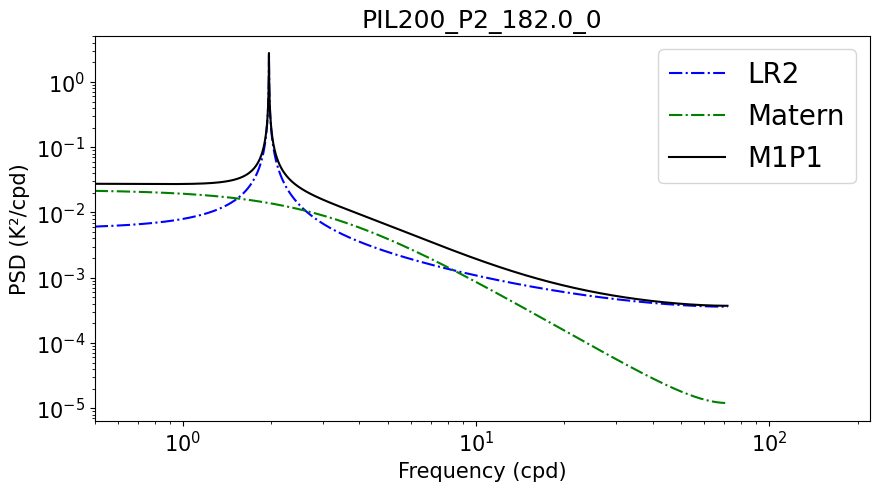

In [303]:
from functions import Plot_figure
importlib.reload(Plot_figure)
plt.rcParams['figure.figsize'] = [10,5]
Plot_figure.Plot_indominating_cases_for_M1P1(Whole_Soln_df_M1P1,'PIL200_P2_182.0_0')

## Cal percentage of variability

In [305]:
from functions import Cov
#calcualte integral timescale
Whole_Soln_df_M1P1_clean['T_D2'] = Whole_Soln_df_M1P1_clean.apply(
    lambda row: Processing.integral_timescale(Cov.LR_2_no_cos, (row['η_D2'], row['τ_D2'], row['γ_D2']), delta=0.001, N=10000),axis=1)
Whole_Soln_df_M1P1_clean['α_c'] = 2*Whole_Soln_df_M1P1_clean['α_c']
Whole_Soln_df_M1P1_clean.rename(columns={'α_c': '2α_c'}, inplace=True)
Whole_Soln_df_M1P1_clean.rename(columns={'Var_subtidal': 'σ^{2}_Subtidal'}, inplace=True)
Whole_Soln_df_M1P1_clean.rename(columns={'HA_D1_var': 'σ^{2}_HA-D1'}, inplace=True)
Whole_Soln_df_M1P1_clean.rename(columns={'HA_D2_var': 'σ^{2}_HA,D2'}, inplace=True)
#Add a depth round for easy gourp
Whole_Soln_df_M1P1_clean = Whole_Soln_df_M1P1_clean.assign(depth_round = -round(Whole_Soln_df_M1P1_clean['Depth']/5)*5)
Whole_Soln_df_M1P1_clean['Var_subset'] = Whole_Soln_df_M1P1_clean['Whole_HA_var']+Whole_Soln_df_M1P1_clean['Var_ε']
Whole_Soln_df_M1P1_clean['HA_var%'] = Whole_Soln_df_M1P1_clean['Whole_HA_var']/Whole_Soln_df_M1P1_clean['Var_subset']*100
Whole_Soln_df_M1P1_clean['Var_model-fit%'] =Whole_Soln_df_M1P1_clean['Var_model_fit']/Whole_Soln_df_M1P1_clean['Var_ε']*100

In [306]:
# Whole_Soln_df_M1P1_clean['η^{2}_S2'] = Whole_Soln_df_M1P1_clean['η_S2']**2
Whole_Soln_df_M1P1_clean['η^{2}_D2'] = Whole_Soln_df_M1P1_clean['η_D2']**2
Whole_Soln_df_M1P1_clean['σ_HA,D2'] = np.sqrt(Whole_Soln_df_M1P1_clean['σ^{2}_HA,D2'])
Whole_Soln_df_M1P1_clean['NPL_var'] = Whole_Soln_df_M1P1_clean['η^{2}_D2'] #+ Whole_Soln_df_M1P1_clean['η^{2}_M2']
Whole_Soln_df_M1P1_clean['PL/NPL'] = Whole_Soln_df_M1P1_clean['Whole_HA_var']/Whole_Soln_df_M1P1_clean['NPL_var']

In [307]:
Whole_Soln_df_M1P1_clean.reset_index(drop=True,inplace=True)
Whole_Soln_df_M1P1_clean.to_csv('Whole_model_fit_parameters_M1P1_clean.csv', index=False)

# Map 

In [309]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [310]:
M2tide_SSH  = xr.open_dataset('HRET_v8.1_compressed.nc')
# Define the latitude and longitude ranges

# Define the latitude and longitude ranges
min_lat, max_lat = -22, -8
min_lon, max_lon = 115, 130

# Extract variables
X_SSH = M2tide_SSH['longitude']
Y_SSH = M2tide_SSH['latitude']
# M2re_SSH = M2tide_SSH['M2re']
M2re_SSH = np.sqrt(np.power(M2tide_SSH['M2re'],2)+np.power(M2tide_SSH['M2im'],2))
# Find the indices corresponding to the latitude and longitude ranges
idx_X_SSH = np.where((X_SSH>min_lon) & (X_SSH<max_lon))
X_SSH = X_SSH[(X_SSH>min_lon) & (X_SSH<max_lon)]

idx_Y_SSH = np.where((Y_SSH>min_lat) & (Y_SSH<max_lat))
Y_SSH = Y_SSH[(Y_SSH>min_lat) & (Y_SSH<max_lat)]

M2re = M2re_SSH.sel(longitude = X_SSH,latitude = Y_SSH)

In [311]:
# Load bathymetric data
bathmetry = xr.open_dataset('gebco_2023_n-7.6245_s-24.5874_w109.6436_e135.7471.nc')

# Extract variables
X_bath = bathmetry['lon']
Y_bath = bathmetry['lat']
idx_X_bath = np.where((X_bath>min_lon) & (X_bath<max_lon))
X_bath = X_bath[(X_bath>min_lon) & (X_bath<max_lon)]
idx_Y_bath = np.where((Y_bath>min_lat) & (Y_bath<max_lat))
Y_bath = Y_bath[(Y_bath>min_lat) & (Y_bath<max_lat)]
topo = bathmetry['elevation'].sel(lon = X_bath,lat= Y_bath)

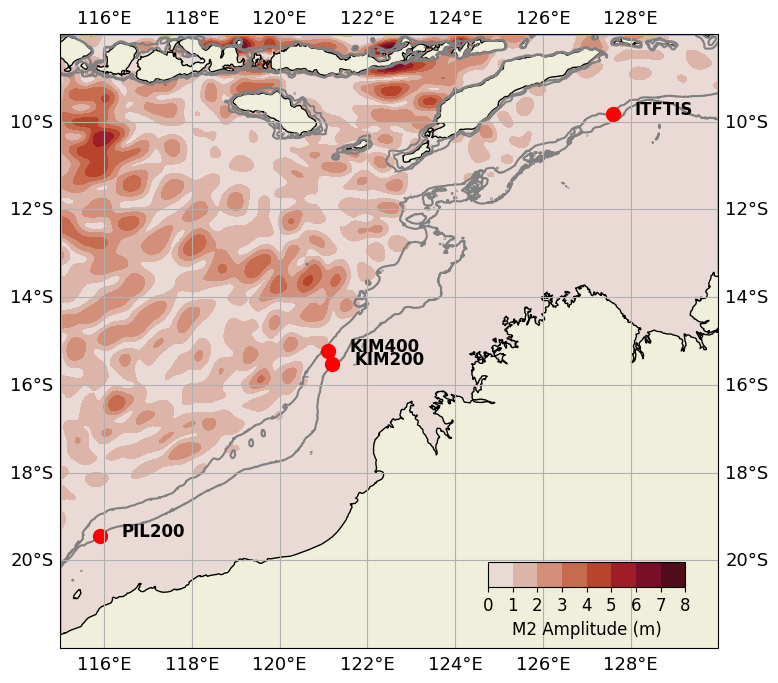

In [312]:
from matplotlib.colors import LinearSegmentedColormap
plt.rcParams['font.size'] = 12
# Location data
lat_list = [-19.44, -15.53,-15.22, -9.817,]
locations = {
    'KIM400': {'latitude': -15.22, 'longitude': 121.1},
    'PIL200': {'latitude': -19.44, 'longitude': 115.9},
    'KIM200': {'latitude': -15.53, 'longitude': 121.2},
    'ITFTIS': {'latitude': -9.817, 'longitude': 127.6},
    # 'NWSROW': {'latitude': -17.76, 'longitude': 119.9},
}
# Create a map using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()},figsize=(8, 7))
# Specify the contour levels you want to display
contour_levels = [-500,-200]
# Plot contour lines for specified levels
contour_plot = plt.contour(X_bath, Y_bath, topo, levels=contour_levels,colors='gray',linestyles='solid')
# Add contour labels
# plt.clabel(contour_plot, inline=True, fontsize=10, fmt='%1.0f',colors = 'black')    
# Plot the contour plot on top of the map
contour_plot = ax.contourf(X_SSH, Y_SSH, M2re*100, cmap='cmo.amp')
# Add colorbar inside the figure
cax = ax.inset_axes([0.65, 0.1, 0.3, 0.04])  # [left, bottom, width, height]
cbar = plt.colorbar(contour_plot, cax=cax,orientation='horizontal')
cbar.set_label('M2 Amplitude (m)')

# Set the extent of the map
ax.set_extent([min_lon, max_lon, min_lat, max_lat])
# Add Natural Earth land and ocean features
land = cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor=cfeature.COLORS['land'])
ocean = cfeature.NaturalEarthFeature('physical', 'ocean', '50m', edgecolor='face', facecolor=cfeature.COLORS['water'])
ax.add_feature(land, zorder=1)
ax.add_feature(ocean, zorder=0)
# Add coastlines and gridlines
ax.coastlines()
# Use Cartopy's gridlines to control tick sizes
gridlines = ax.gridlines(draw_labels=True)
gridlines.xlabel_style = {'size': 13}  # Set font size for longitude labels
gridlines.ylabel_style = {'size': 13}  # Set font size for latitude labels
# Add markers and labels for specified locations
for location, data in locations.items():
    ax.plot(data['longitude'], data['latitude'], 'ro', markersize=10, transform=ccrs.PlateCarree())
    ax.text(data['longitude'] + 0.5, data['latitude'], location, transform=ccrs.PlateCarree(), fontweight='bold')

ax.set_title('')
ax.grid(True)

# Adjust layout
fig.tight_layout()
plt.savefig('mooring map.pdf', bbox_inches='tight')
# Show the map
plt.show()

# Model fit plots Examples

In [314]:
Whole_Model_fit_Eg = [PIL200_Model_fit_Eg,KIM200_Model_fit_Eg,KIM400_Model_fit_Eg,ITFTIS_Model_fit_Eg,]
# Whole_Model_fit_Eg = [KIM400_Model_fit_Eg]
# Whole_Model_fit_Eg

In [315]:
O1_freq = 0.0387*24 #cpd
K1_freq = 0.0418*24 #cpd
S2_freq = 0.0833*24 #cpd
M2_freq = 0.0805*24 #cpd
xcoords = [O1_freq,K1_freq,M2_freq,S2_freq]

In [316]:
# Site = Whole_Model_fit_Eg[0]  # Pick the first site (change index if needed)
# site_name ='KIM400'

# rows = len(Site['Sorted_Depths'])
# color_set  = ['tab:blue', 'orange', 'green'] 
# line_type = ['Obs','M1P1','GM']

# fig, axes = plt.subplots(rows, 1, figsize=(6, 10), sharex=True)
# axes = axes if isinstance(axes, np.ndarray) else [axes]
# plt.rcParams['font.size'] = 15

# for depth_order in range(rows):
#     axes[depth_order].plot(Site['F_obs'][depth_order], Site['P_obs'][depth_order],
#                            color='tab:blue', alpha=0.5)
#     Peaks = Processing.Coherent_peaks(xcoords,Site['Mean_params'][depth_order],Site['F_obs'][depth_order])
#     axes[depth_order].plot(Site['F_obs'][depth_order],Peaks,color='tab:red')
#     axes[depth_order].plot(Site['F_model_fit'][depth_order], Site['P_model_fit'][depth_order],
#                            color='orange')
#     axes[depth_order].plot(Site['F_gm'], Site['P_gm'], color='green')
#     axes[depth_order].set_title('{} m'.format(Site['Sorted_Depths'][depth_order]))
#     axes[depth_order].set_xscale("log")
#     axes[depth_order].set_yscale("log")
#     axes[depth_order].set_ylim(1e-5, 3)
#     axes[depth_order].set_xlim(0.5, 50)
#     axes[depth_order].grid(True, which='both', alpha=0.5)
# # Axis labels
# fig.text(0.5, 0.02, 'Frequency (cpd)', ha='center', va='center')
# fig.text(0.01, 0.5, 'Wave Spectrum (K²/cpd)', ha='center', va='center', rotation='vertical')
# # Overall legend
# handles = [plt.Line2D([0], [0], color=color_set[i], linestyle='-', label=line_type[i])
#            for i in range(len(color_set))]
# fig.legend(handles=handles, loc=(0.75, 0.53))
# fig.tight_layout()
# plt.show()

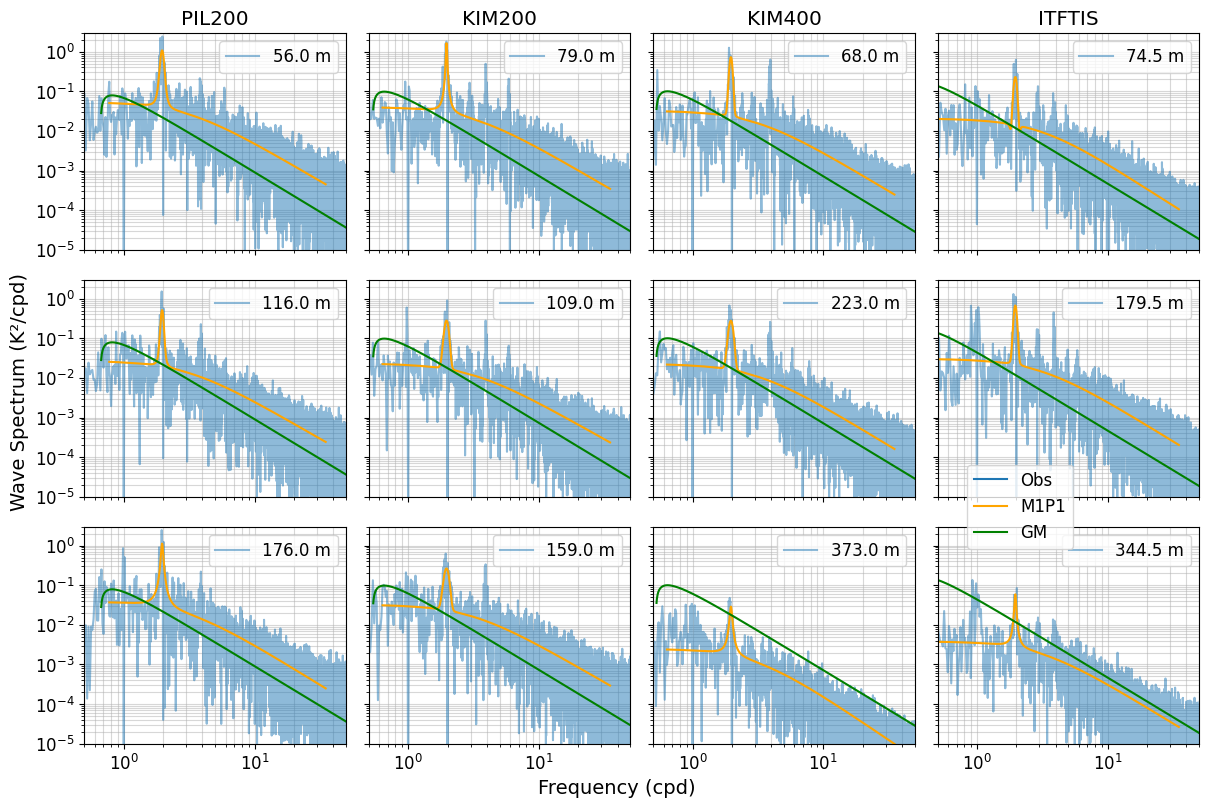

In [317]:
Site_name = Whole_Soln_df_M1P1['Site'].drop_duplicates()
rows = len(KIM400_Model_fit_Eg['Sorted_Depths'])
cols = len(Whole_Model_fit_Eg)
color_set  = ['tab:blue', 'orange', 'green'] 
line_type = ['Obs','M1P1','GM']
fig, axes = plt.subplots(rows, cols, figsize=(12, 8), sharex='col', sharey='row')
plt.rcParams['font.size'] = 12
for i, Site in enumerate(Whole_Model_fit_Eg):
    for depth_order in range(len(Site['Sorted_Depths'])):
        axes[depth_order,i].plot(Site['F_obs'][depth_order],Site['P_obs'][depth_order],label = '{} m'.format(Site['Sorted_Depths'][depth_order]),color='tab:blue',alpha=0.5)
        # Peaks = Processing.Coherent_peaks(xcoords,Site['Mean_params'][depth_order],Site['F_obs'][depth_order])
        # axes[depth_order,i].plot(Site['F_obs'][depth_order],Peaks,color='tab:red')
        axes[depth_order,i].plot(Site['F_model_fit'][depth_order],Site['P_model_fit'][depth_order],color='orange')
        axes[depth_order,i].plot(Site['F_gm'],Site['P_gm'],color='green',)
        axes[depth_order,i].set_xscale("log")
        axes[depth_order,i].set_yscale("log")
        axes[depth_order,i].set_ylim(1e-5, 3)
        axes[depth_order,i].set_xlim(0.5,50)
        axes[depth_order,i].legend(loc='upper right')
        axes[depth_order,i].grid(True,which='both',alpha=0.5)
        if depth_order==0:
            axes[depth_order,i].set_title(Site_name.iloc[i])
        
fig.text(0.5, 0.005, 'Frequency (cpd)', ha='center', va='center',fontsize = 14)
fig.text(0.002, 0.5, 'Wave Spectrum (K²/cpd)', ha='center', va='center', rotation='vertical',fontsize = 14)
# Create handles for the legend
handles = [plt.Line2D([0], [0], color=color_set[i], linestyle='-', label=line_type[i]) for i in range(len(color_set))]
# Place the legend
fig.legend(handles=handles, loc=(0.8,0.32),)  

# Adjust layout
fig.tight_layout()  # Adjust the rectangle to leave space for the y-axis label and legend
plt.savefig('model fit result at selected depths.pdf', bbox_inches='tight')
# Show the plot
plt.show()

# Pair plots 

In [319]:
from functions import Plot_figure
importlib.reload(Plot_figure)

<module 'functions.Plot_figure' from 'C:\\Users\\21924032\\GitHub\\Yutao_PhD_codes\\Aim1 1D Internal wave modeling\\notebooks\\1D internal tide temp model fit V1.7\\functions\\Plot_figure.py'>

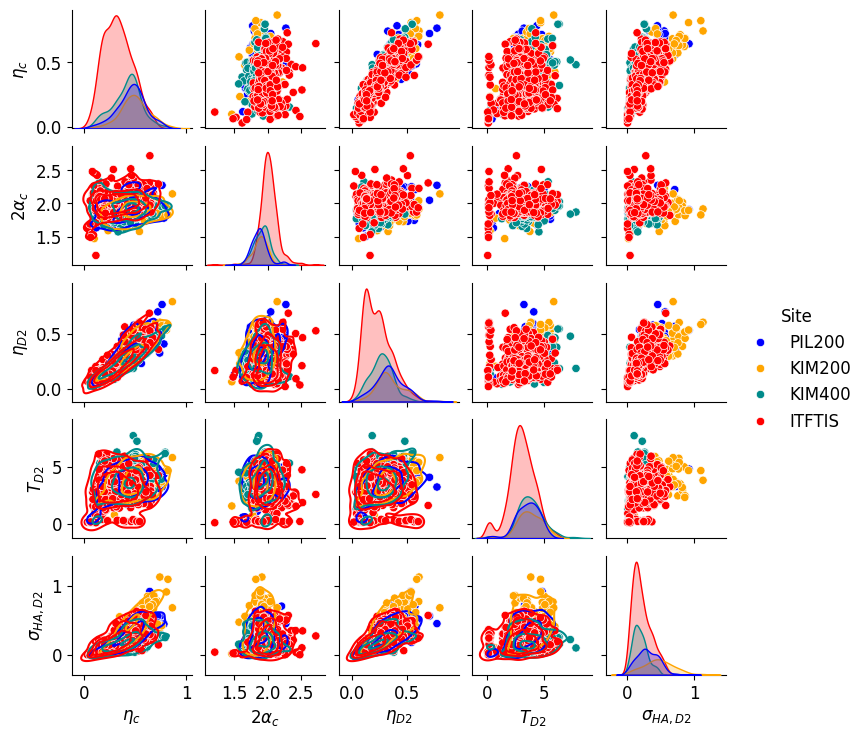

In [320]:
plt.rcParams['font.size'] = 12
importlib.reload(Plot_figure)
# selected_columns = ['Site','η_c','2α_c','η_D1','η_D2','τ_D1','τ_D2','σ^{2}_Subtidal','HA_var']
selected_columns = ['Site','η_c','2α_c','η_D2','T_D2','σ_HA,D2',]#'σ^{2}_Subtidal'],'Whole_HA_var']
colors = ['blue', 'orange', 'darkcyan','red'] 
pair_plot = Plot_figure.Plot_pair_plots(Whole_Soln_df_M1P1_clean,selected_columns,colors,height=1.5, aspect=1)
pair_plot.savefig('parameter_pair_plot.pdf', bbox_inches='tight')

In [321]:
# selected_columns = ['Site','η_c','σ^{2}_Subtidal','σ^{2}_HA,D2','η^{2}_D2','T_D2','2α_c',]
# colors = ['blue', 'orange', 'darkcyan','red'] 
# plt.rcParams['figure.figsize'] = [15, 15]
# plt.rcParams['font.size'] = 25
# pair_plot = Plot_figure.Plot_pair_plots(Whole_Soln_df_M1P1_clean.loc[Whole_Soln_df_M1P1_clean['σ^{2}_Subtidal']<5],selected_columns,colors)
# pair_plot.savefig('var_pair_plot.pdf', bbox_inches='tight')

In [322]:
# plt.rcParams['figure.figsize'] = [15, 15]
# plt.rcParams['font.size'] = 25
# selected_columns = ['Site','η_c','η_D1','η_D2','2α_c',]
# colors = ['blue', 'orange', 'darkcyan','red']
# importlib.reload(Plot_figure)
# pair_plot = Plot_figure.Plot_pair_plots(Whole_Soln_df_M1P1_clean,selected_columns,colors)
# pair_plot.savefig('parameter_pair_plot.pdf', bbox_inches='tight')

In [323]:
# plt.rcParams['figure.figsize'] = [15, 15]
# plt.rcParams['font.size'] = 25
# selected_columns = ['season','η_c','η_D2','2α_c','σ^{2}_HA,D2']
# colors = ['blue', 'orange', 'darkcyan','red']
# importlib.reload(Plot_figure)
# pair_plot = Plot_figure.Plot_pair_plots(Whole_Soln_df_M1P1_clean[~(Whole_Soln_df_M1P1_clean['Site']=='ITFTIS')],selected_columns,colors)
# # pair_plot.savefig('parameter_pair_plot.pdf', bbox_inches='tight')

# Parameter and Var medium and sd

In [325]:
M1P1_parameter_name = ['η_c','2α_c', 'η_D2', 'τ_D2','γ_D2','T_D2','HA_var%','Var_model-fit%']
importlib.reload(Processing)
Processing.Calc_Parameter_medium_and_std(Whole_Soln_df_M1P1_clean,M1P1_parameter_name)

,η_c,2α_c,η_D2,τ_D2,γ_D2,T_D2,HA_var%,Var_model-fit%
Site,,,,,,,,
ITFTIS,0.32 (0.14),2.01 (0.13),0.22 (0.12),3.26 (1.51),1.02 (0.6),3.01 (1.13),43.49 (19.4),96.99 (3.78)
KIM200,0.5 (0.14),1.89 (0.11),0.32 (0.13),4.15 (1.4),1.75 (0.45),3.7 (1.04),45.36 (15.34),98.94 (2.23)
KIM400,0.44 (0.14),1.93 (0.12),0.26 (0.1),4.11 (1.83),1.07 (0.48),3.7 (1.13),19.61 (10.81),99.16 (3.64)
PIL200,0.47 (0.14),1.87 (0.12),0.34 (0.13),4.04 (1.32),1.04 (0.41),3.64 (0.98),24.57 (11.99),98.25 (1.81)


<!-- ## Box plot -->

# Stratification

In [328]:
importlib.reload(Processing)
threshold = 40 #m
seasons = Whole_Soln_df_M1P1_clean['season'].drop_duplicates()
for i, loc in enumerate(locations):
    for j, season in enumerate(seasons):
        data = Whole_Soln_df_M1P1_clean.loc[(Whole_Soln_df_M1P1_clean['Site'] =='{}'.format(loc)) & (Whole_Soln_df_M1P1_clean['season'] =='{}'.format(season))].copy()
        #find the depth of max η_c
        max_value_depth_up, max_value_depth_down = Processing.Find_max_η_depth(data,lat_list[i],threshold)
        thermocline_depth = (max_value_depth_up+max_value_depth_down)/2
        print(loc,season,thermocline_depth)

for i,loc in enumerate(locations):
    for season in[['May-Jul','Aug-Oct'],['Feb-Apr','Nov-Jan']]:
        avg_thermocline_depth = Processing.Find_avg_thermocline_depth(Whole_Soln_df_M1P1_clean,loc,lat_list[i],season,threshold=10)
        print(loc,avg_thermocline_depth)

KIM400 Feb-Apr -65.0000610013836
KIM400 May-Jul -65.0000610013836
KIM400 Aug-Oct -102.50074666996721
KIM400 Nov-Jan -35.00006104037101
PIL200 Feb-Apr -192.5001368535067
PIL200 May-Jul -192.5001368535067
PIL200 Aug-Oct -187.5003801892175
PIL200 Nov-Jan -45.00054913838159
KIM200 Feb-Apr -45.00006101452689
KIM200 May-Jul -190.0002433047366
KIM200 Aug-Oct -195.0002432787605
KIM200 Nov-Jan -40.00006102102198
ITFTIS Feb-Apr -150.00097385544106
ITFTIS May-Jul -107.5001370725777
ITFTIS Aug-Oct -110.00006091789976
ITFTIS Nov-Jan -95.00024374950186
KIM400 -83.7504038356754
KIM400 -50.00006102087731
PIL200 -190.0002585213621
PIL200 -118.75034299594414
KIM200 -192.50024329174857
KIM200 -42.50006101777444
ITFTIS -108.75009899523874
ITFTIS -122.50060880247145


# box plots for individual location

## Deep

KIM400 -66.87523237939857
ITFTIS -115.6253538988551


(<Figure size 800x1200 with 4 Axes>,
 array([<Axes: title={'center': '(a)'}, xlabel='$η_{c}$ (K)', ylabel='Depth(m)'>,
        <Axes: title={'center': '(b)'}, xlabel='$2α_{c}$ ()'>,
        <Axes: title={'center': '(c)'}, xlabel='$η_{D2}$ (K)', ylabel='Depth(m)'>,
        <Axes: title={'center': '(d)'}, xlabel='$T_{D2}$ (d)'>],
       dtype=object))

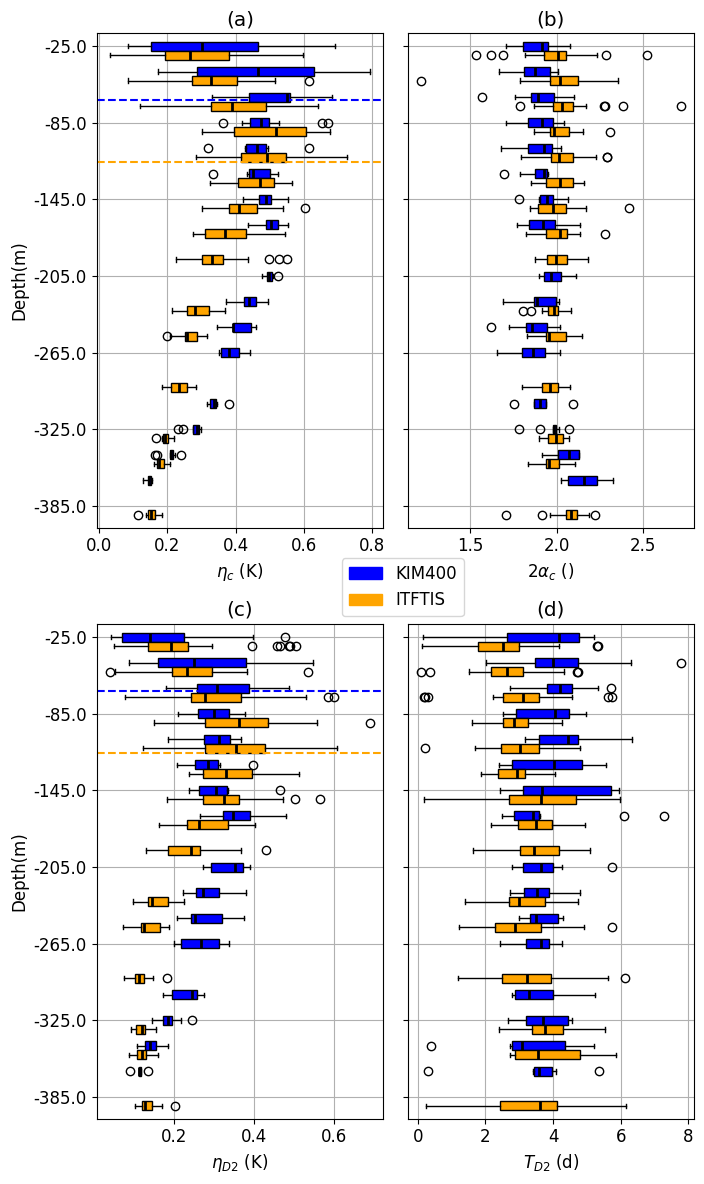

In [331]:
importlib.reload(Plot_figure)
importlib.reload(Processing)
# threshold = 40 #m
bin_size = 20 #m
M1L2_parameter_name = ['η_c','2α_c','η_D2','T_D2']
M1L2_parameter_units = ['K','','K','d','K','d',]
colors = ['blue', 'orange', 'purple','red'] 
locations = ['KIM400','ITFTIS']
lat_list = [-15.22, -9.817,]
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = [8, 12]
Plot_figure.Plot_depth_box_plot(locations,lat_list,Whole_Soln_df_M1P1_clean,bin_size,
                       M1L2_parameter_name,M1L2_parameter_units,colors,
                       save=True)

## Shallow

KIM200 -117.5001521568732
PIL200 -154.37530081768895


(<Figure size 800x1200 with 4 Axes>,
 array([<Axes: title={'center': '(a)'}, xlabel='$η_{c}$ (K)', ylabel='Depth(m)'>,
        <Axes: title={'center': '(b)'}, xlabel='$2α_{c}$ ()'>,
        <Axes: title={'center': '(c)'}, xlabel='$η_{D2}$ (K)', ylabel='Depth(m)'>,
        <Axes: title={'center': '(d)'}, xlabel='$T_{D2}$ (d)'>],
       dtype=object))

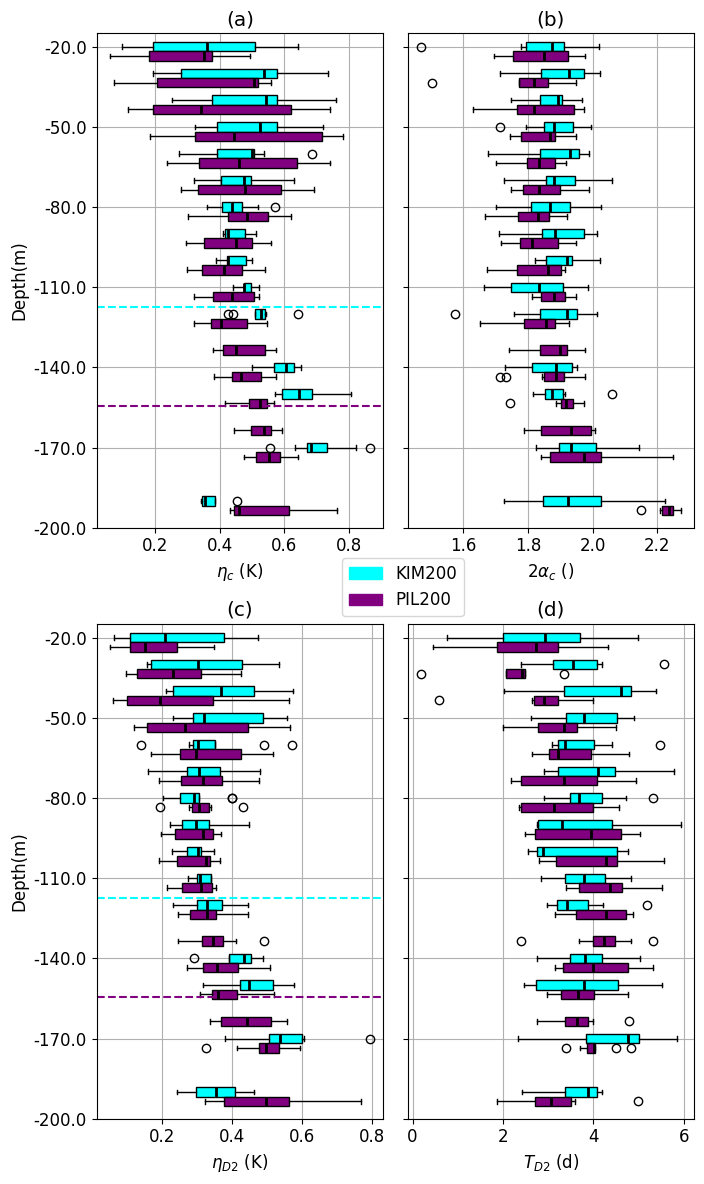

In [333]:
# Plot box plot
bin_size = 10 #m
M1L2_parameter_name = ['η_c','2α_c','η_D2','T_D2']
M1L2_parameter_units = ['K','','K','d','K','d',]
colors = ['Cyan', 'Purple',] 
locations = ['KIM200','PIL200',]
lat_list = [-15.53,-19.44,]
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = [8, 12]
Plot_figure.Plot_depth_box_plot(locations,lat_list,Whole_Soln_df_M1P1_clean,bin_size,
                       M1L2_parameter_name,M1L2_parameter_units,colors,
                       save=True)

PIL200 -154.37530081768895
KIM400 -66.87523238262901
ITFTIS -115.6253538988551


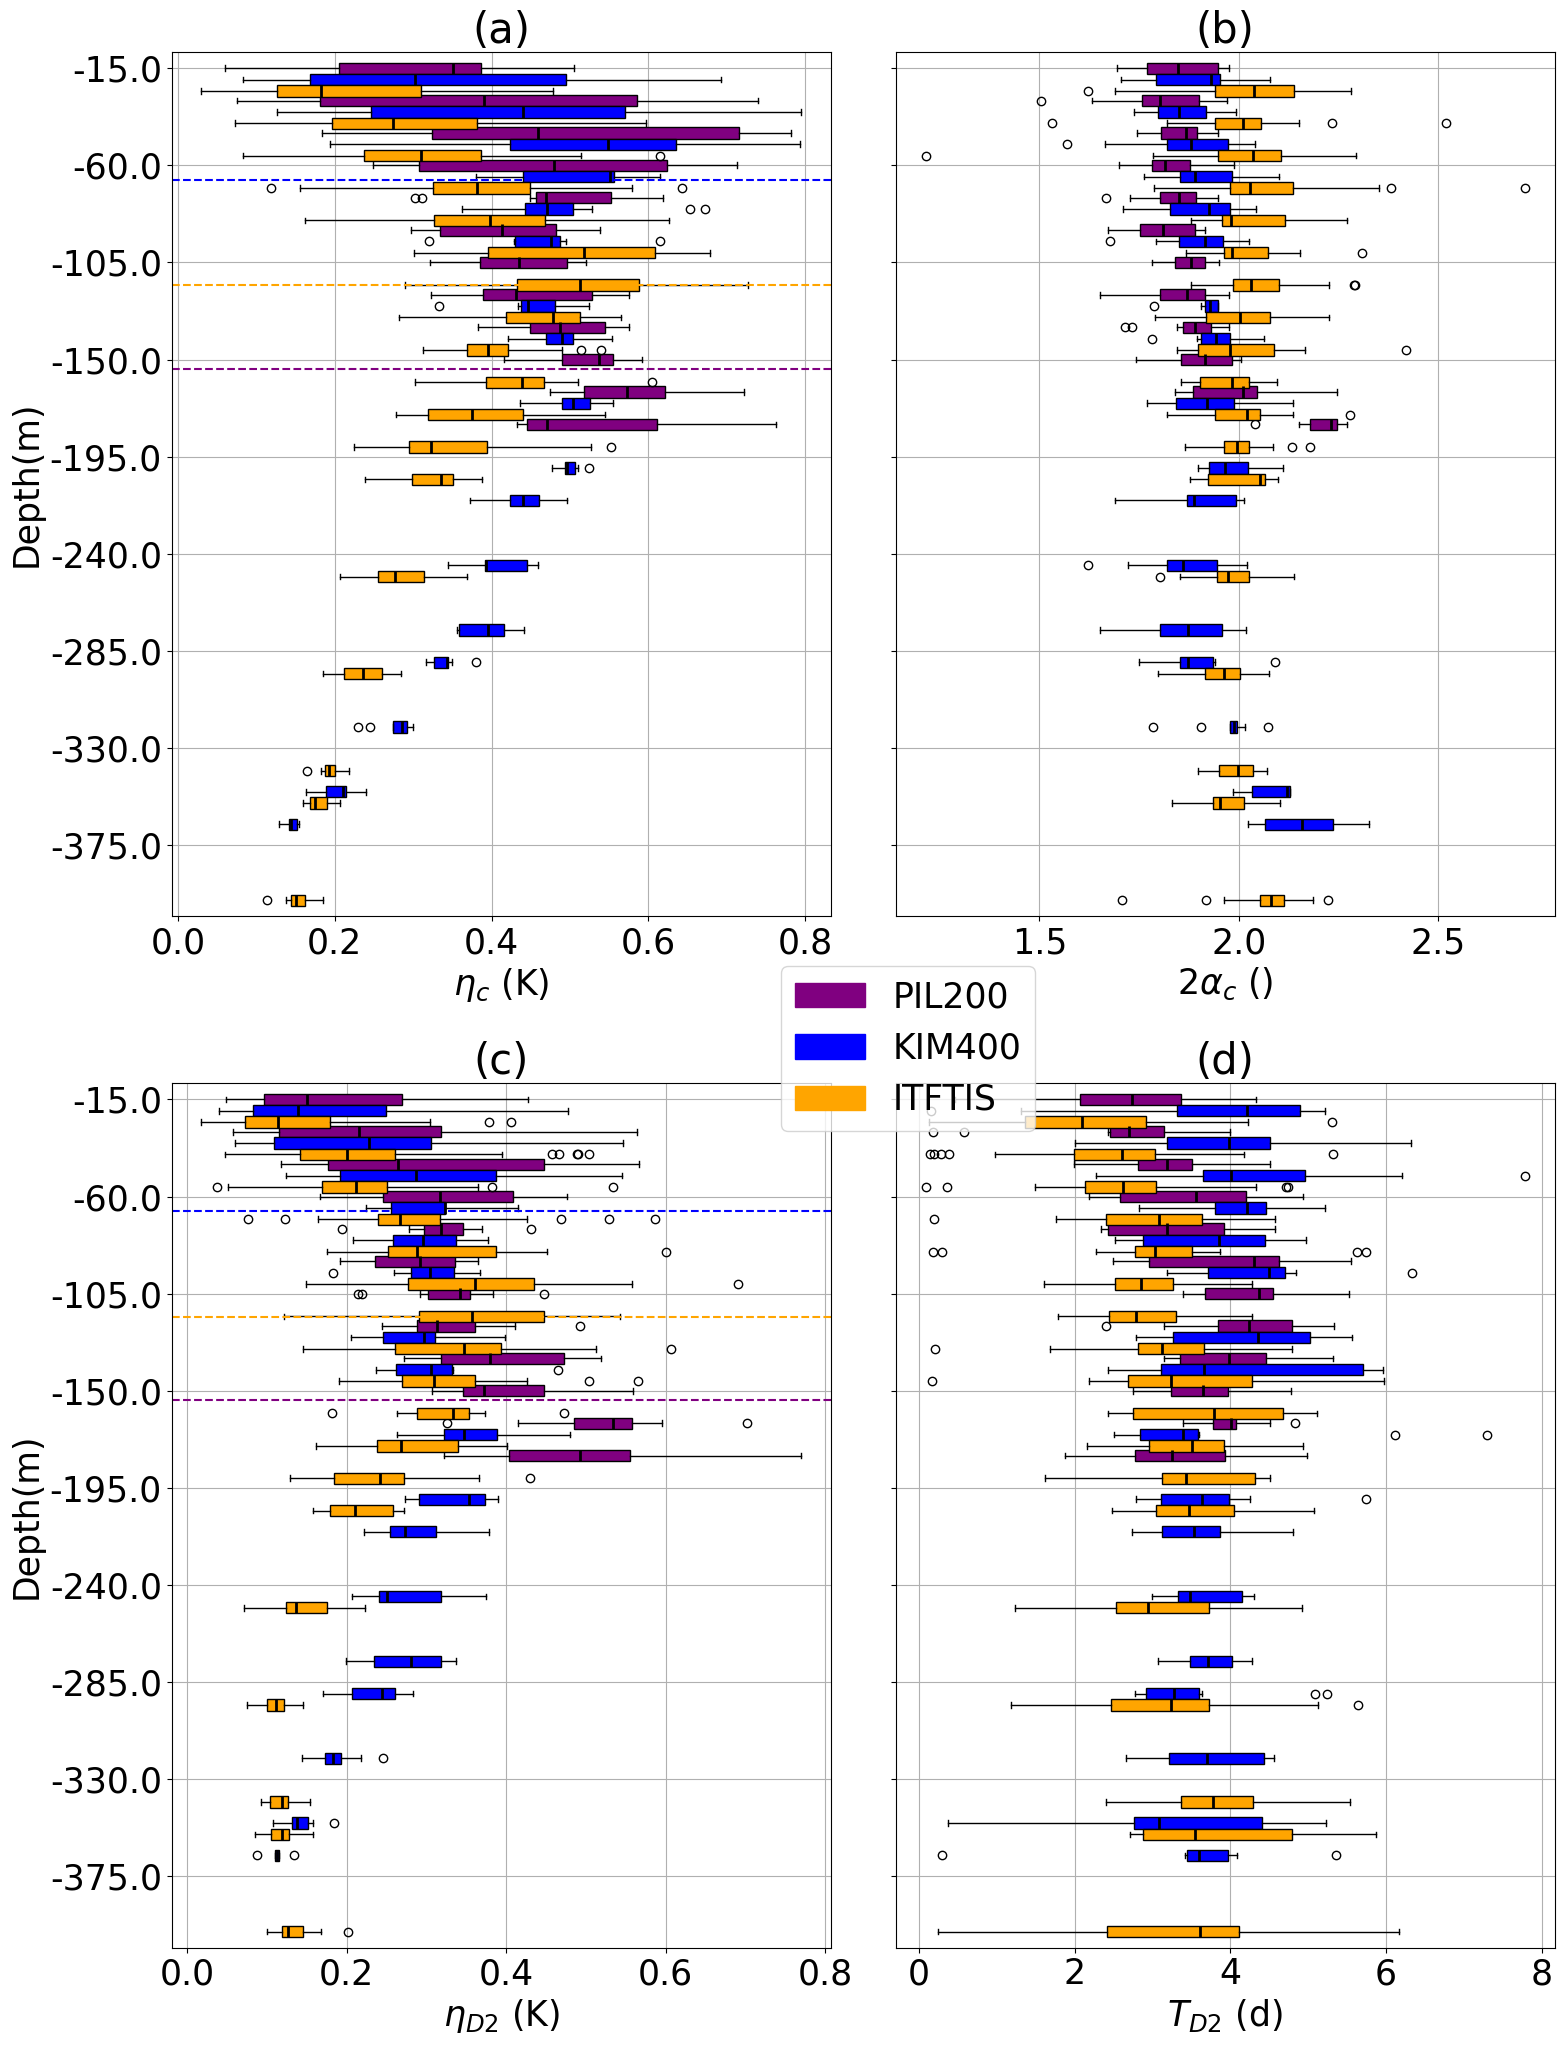

In [334]:
importlib.reload(Plot_figure)
importlib.reload(Processing)
bin_size = 15 #m
M1L2_parameter_name = ['η_c','2α_c','η_D2','T_D2']
M1L2_parameter_units = ['K','','K','d','K','d',]
colors = ['Purple', 'blue', 'orange', ] 
locations = ['PIL200','KIM400','ITFTIS',]
lat_list = [-19.44, -15.53,-9.817,]
plt.rcParams['font.size'] = 25
plt.rcParams['figure.figsize'] = [18, 21]
figs,axes = Plot_figure.Plot_depth_box_plot(locations,lat_list,Whole_Soln_df_M1P1_clean,bin_size,
                       M1L2_parameter_name,M1L2_parameter_units,colors,
                       save=True)

# Seasonal variability

## For all parameter

In [337]:
# M1L2_parameter_name = ['η_c','2α_c','η_D1','τ_D1','η_D2','τ_D2']
# M1L2_parameter_units = [ 'K','','K','d','K','d' ]
# colors = ['blue', 'orange', 'darkcyan','red'] 
# lat_list = [-19.44, -15.53,-15.22, -9.817,]
# plt.rcParams['figure.figsize'] = [15, 30]
# bbox_to_anchor = (0.885,0.45)
# fig,axes = Plot_figure.Plot_seasonal_variability(Whole_Soln_df_M1P1_clean,M1L2_parameter_name,M1L2_parameter_units,lat_list,
#                              colors,bbox_to_anchor,threshold = 20,save=False)

## For particular parameter 

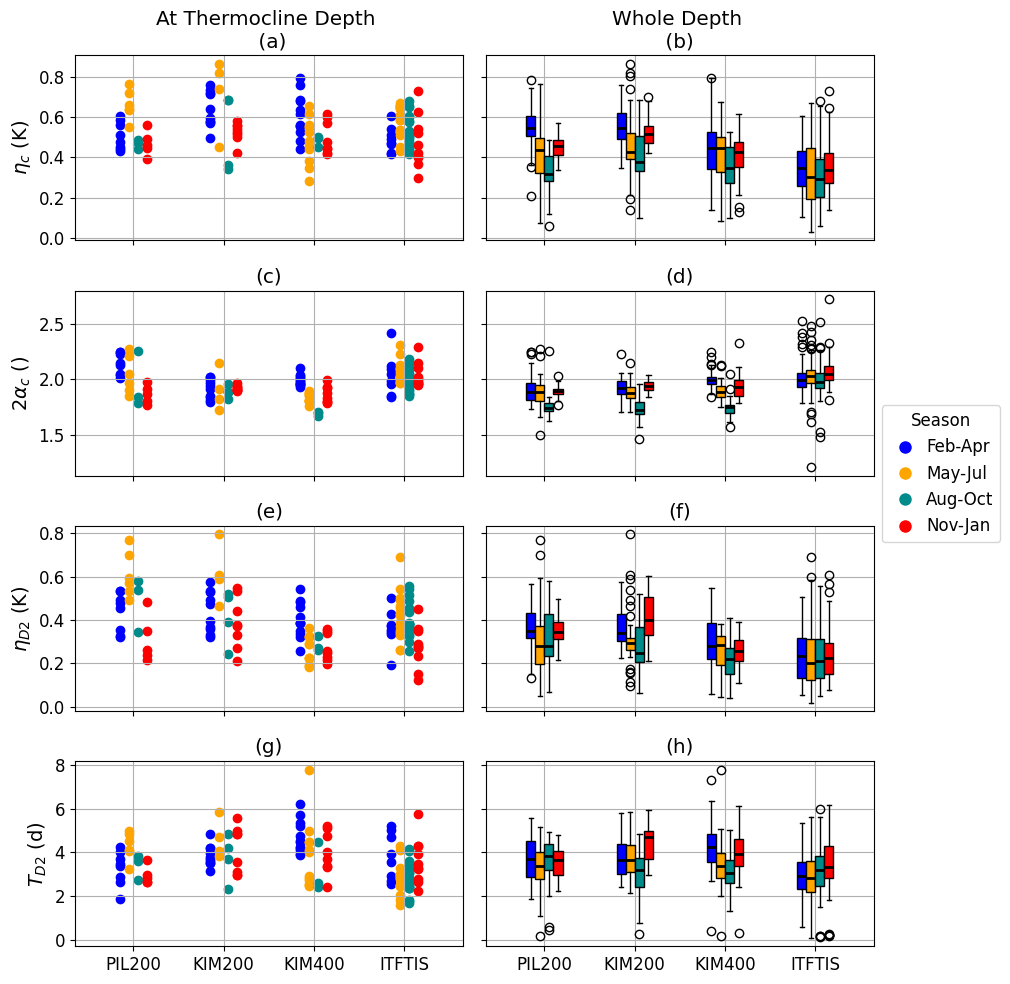

In [339]:
# M1L2_parameter_name = ['η_c','2α_c','η_D2','τ_D2','σ^{2}_HA,D2',]
# M1L2_parameter_units = [  'K','', 'K','d','K²']
M1L2_parameter_name = ['η_c','2α_c','η_D2','T_D2']
M1L2_parameter_units = [  'K','', 'K','d',]
colors = ['blue', 'orange', 'darkcyan','red'] 
lat_list = [-19.44, -15.53,-15.22, -9.817,]
plt.rcParams['figure.figsize'] = [10,10]
plt.rcParams['font.size'] = 12
importlib.reload(Plot_figure)
bbox_to_anchor = (0.89,0.45)
fig,axes = Plot_figure.Plot_seasonal_variability(Whole_Soln_df_M1P1_clean,M1L2_parameter_name,M1L2_parameter_units,lat_list,
                             colors,bbox_to_anchor,threshold = 20,save=True)
# axes[-1].set_ylim(0,0.8)

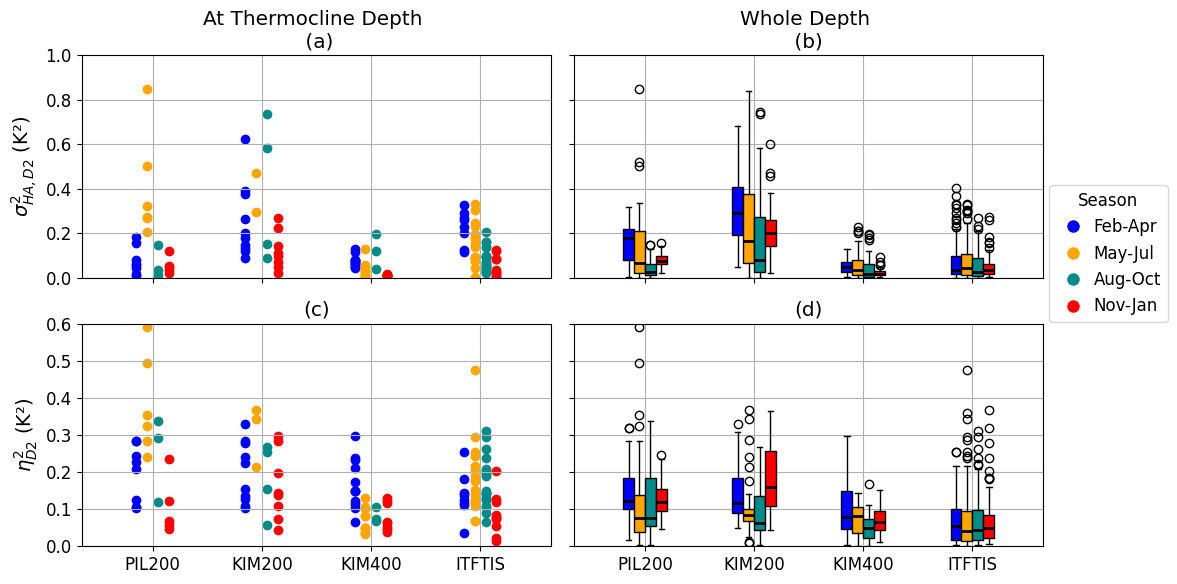

In [340]:
M1L2_parameter_name = ['σ^{2}_HA,D2','η^{2}_D2',]#'σ^{2}_Subtidal',]
M1L2_parameter_units = ['K²','K²','K²',]
colors = ['blue', 'orange', 'darkcyan','red'] 
lat_list = [-19.44, -15.53,-15.22, -9.817,]
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['font.size'] = 12
importlib.reload(Plot_figure)
bbox_to_anchor = (0.89,0.45)
fig,axes = Plot_figure.Plot_seasonal_variability(Whole_Soln_df_M1P1_clean,M1L2_parameter_name,M1L2_parameter_units,lat_list,
                             colors,bbox_to_anchor,threshold = 20,save=False)
axes[0].set_ylim(0,1)
axes[2].set_ylim(0,0.6)
# axes[-1].set_ylim(0,2)
plt.savefig('Seasonal_variability_of_var_parameter.pdf', bbox_inches='tight')

In [341]:
import matplotlib.pyplot as plt
import numpy as np
import string
import math

def Plot_seasonal_variability(df, parameter_name, parameter_units, lat_list,
                              colors, bbox_to_anchor, threshold=20, save=False):
    # df_info
    locations = df['Site'].drop_duplicates()
    seasons = df['season'].drop_duplicates()
    figure_order = [list(string.ascii_lowercase)[i % 26] for i in range(len(parameter_name))]

    # plot setup
    cols = 2
    rows = math.ceil(len(parameter_name) / cols)
    fig, axes = plt.subplots(rows, cols, sharex=True)
    axes = axes.flatten()
    positions = np.arange(len(locations))
    width = 0.1  # bar width

    # plotting
    for parameter_order, p_name in enumerate(parameter_name):
        ax = axes[parameter_order]
        for i, loc in enumerate(locations):
            for j, season in enumerate(seasons):
                data = df.loc[(df['Site'] == loc) & (df['season'] == season)].copy()
                data_whole = data[p_name].values
                if len(data_whole) > 4:
                    ax.boxplot(data_whole,
                               positions=[i + j * width],
                               widths=width, patch_artist=True,
                               boxprops=dict(facecolor=colors[j]),
                               medianprops=dict(color='black', linewidth=2))
        param_label = r"$" + p_name.replace("_", r"_{").replace("{", r"{") + "}$"
        ax.set_ylabel(f'{param_label} ({parameter_units[parameter_order]})', fontsize=20)
        ax.set_title(f'({figure_order[parameter_order]})',)
        ax.set_xticks(positions + (len(seasons) - 1) * width / 2)
        ax.set_xticklabels(locations)
        ax.grid(True)

    # Hide any unused axes
    for i in range(len(parameter_name), len(axes)):
        fig.delaxes(axes[i])

    # Create a custom legend for the seasons
    season_legend = {season: color for season, color in zip(seasons, colors)}
    handles = [plt.Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=season_legend[season], markersize=10) for season in seasons]
    labels = seasons
    fig.legend(handles, labels, title='Season', loc=(0.8, 0.5),
               bbox_to_anchor=bbox_to_anchor, fontsize='small', handletextpad=0.25)
    # Adjust layout
    fig.tight_layout(rect=[0, 0, 0.9, 1])
    if save:
        plt.savefig('Seasonal_variability_whole_depth_only_2x2.pdf', bbox_inches='tight')
    return fig, axes


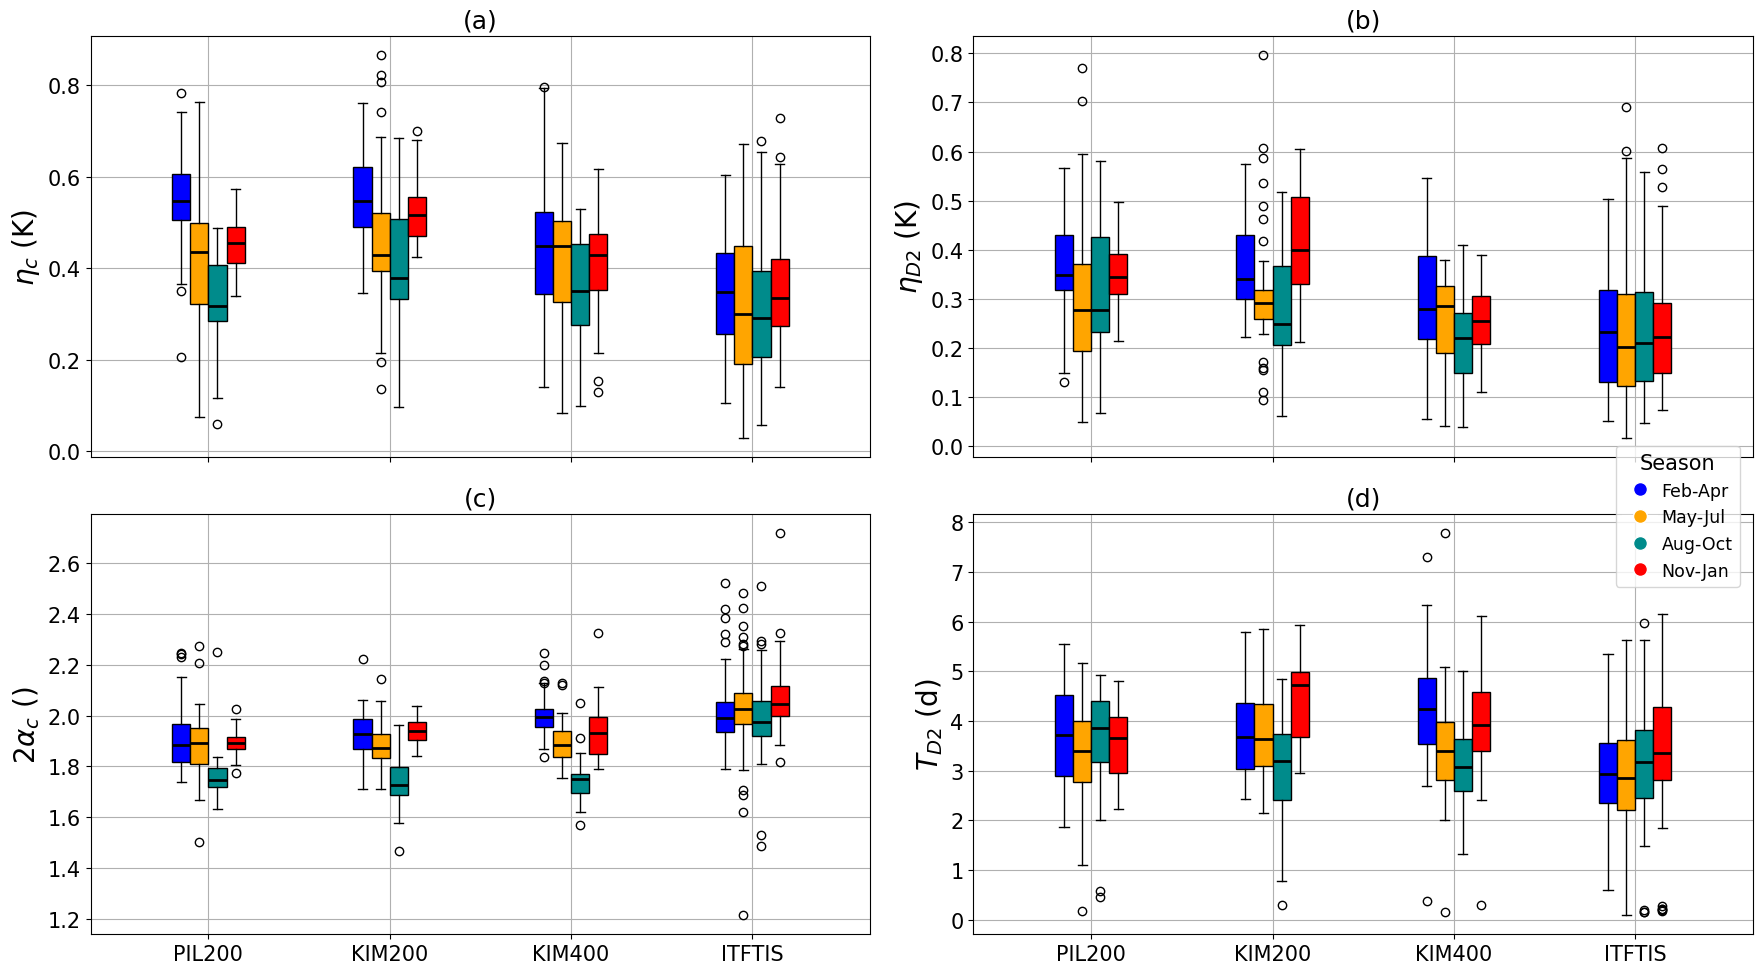

In [342]:
M1L2_parameter_name = ['η_c','η_D2','2α_c','T_D2']
M1L2_parameter_units = [  'K','K','','d',]
colors = ['blue', 'orange', 'darkcyan','red'] 
lat_list = [-19.44,-15.22, -9.817,]
plt.rcParams['figure.figsize'] = [20,10]
plt.rcParams['font.size'] = 15
importlib.reload(Plot_figure)
bbox_to_anchor = (0.82,0.40)
fig,axes = Plot_seasonal_variability(Whole_Soln_df_M1P1_clean,M1L2_parameter_name,M1L2_parameter_units,lat_list,
                             colors,bbox_to_anchor,threshold = 20,save=True)
# axes[-1].set_ylim(0,0.8)